# Summary



<p>
Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.<br>
<a href="https://keras.io/">Keras</a> 
</p> 

<p>
Scikit is a simple and efficient tools for data mining and data analysis.
It is accessible to everybody, and reusable in various context and built on NumPy, SciPy, and matplotlib.
<br>
<a href="https://scikit-learn.org/stable/index.html">Scikit</a> 
</p> 

<p>
This project applies both machine learning packages to solve linear regression problems
and uses the KerasRegressor Wrapper of the Scikit-Learn API to integrate boths packages.
At some points evaluation is done with Scikit cross validation functionality while
deep learning algorithms provided by Keras are supplied. 
The quite arbitary chosen research goal is to predict the Salinity of the water first
with simple and then with mutiple linear regression applying the least-ordinal-regression
algorithm with scikit and deep learning models with Keras. 
It is also investigated how the performance of deep learning models varies with the number of layers
and number of epochs.
</p> 

<p>
The data set used here is the CalCOFI. It and presents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. It includes abundance data on the larvae of over 250 species of fish; larval length frequency data and egg abundance data on key commercial species; and oceanographic and plankton data. The physical, chemical, and biological data collected at regular time and space intervals quickly became valuable for documenting climatic cycles in the California Current and a range of biological responses to them. For this project only a minimal domain knowlege is given.<br>
<a href="https://www.kaggle.com/sohier/calcofi/data#bottle.csv">
Kaggle: CalCOFI</a> 
</p>


<p>
This project in applies Matplotlib, Pandas, Scikit, Keras and other methods to the data set. 
The subsequent methods are applied:
</p>

<ul>
<li>Data import</li>  
<li>Data exploration & cleaning</li>
<li>Data visualization</li>
<li>Data import</li>
<li>Data preprocessing</li> 
<li>Train-test-split</li>
<li>Scaling</li>
<li>Random sampling</li>
<li>Data modeling with simple linear regression</li>
<li>Linear regression with scikit as base model</li> 
<li>Feature selection</li>
<li>Deep Learning models on a simple linear regression problem</li> 
<li>Creating deep learning layers with keras</li> 
<li>Compiling the models and fitting the data</li> 
<li>Earlystoppings and callbacks</li> 
<li>Plotting the graph of the model</li>   
<li>Plotting the learning curves based on model loss and mse</li>
<li>Visualization of observed, actual values and fitted, predicted values</li>
<li>Dashboard of relationships between observed and predicted values</li>
<li>Creating scikit-pipelines</li>
<li>Using the KerasRegressor wrapper for the Scikit-Learn API</li>         
<li>Model evaluation with mean-squared-error</li>
<li>Applying scikit KFold and cross validation score methods</li>    
</ul>

<p>
Comments are and explanations are given within the coding and a conclusion is made at the end.
</p> 



# Import packages

In [159]:
import os 
dirpath = os.getcwd()
foldername = os.path.basename(dirpath)
print(foldername)

DeepLearning_Keras


In [160]:
import pandas as pd
print("pandas version: ", pd.__version__)
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from PIL import Image

plt.rcParams['font.size'] = 11
plt.rcParams['font.style'] = 'italic'
plt.rcParams['font.family'] = 'monospace'

import numpy as np
print("numpy version: ", np.__version__)
import scipy.stats
import math
import os
import types
from random import sample
from random import choices
import random
import warnings

import sklearn
from sklearn.pipeline import Pipeline
print("SKlearn version: ", sklearn.__version__)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict


pandas version:  0.25.2
numpy version:  1.16.5
SKlearn version:  0.21.3


In [161]:
# keras plots need python-graphviz and to_dot pydot
# this does the trick
import pydotplus
import pydot as pyd
import graphviz

In [162]:
import tensorflow as tf

In [163]:
print("tensorflow version: ", tf.__version__)

tensorflow version:  1.13.1


In [164]:
tf.keras.__version__

'2.2.4-tf'

In [165]:
# import keras
from tensorflow import keras

In [166]:
# print("keras version: ", keras.__version__)
print("keras version: ", keras.__version__)

keras version:  2.2.4-tf


In [167]:
# Visualization
from keras.utils.vis_utils import model_to_dot
# keras.utils.vis_utils.pydot = pyd
from keras.utils import plot_model

# The Sequential model is a linear stack of layers.
# every unit in the layer is connected to every unit in the previous layer
# https://keras.io/getting-started/sequential-model-guide/

from keras.utils import to_categorical
from keras.models import Sequential
# The Sequential model is a linear stack of layers.
from keras.layers import Dense, Activation, Conv2D, Conv1D, Flatten, Dropout, MaxPool2D, BatchNormalization
# every unit in the layer is connected to every unit in the previous layer
# https://keras.io/getting-started/sequential-model-guide/
from keras.datasets import fashion_mnist
from keras.callbacks import ModelCheckpoint
from keras import metrics
import keras.preprocessing
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.pipeline import Pipeline



## Data import

<p>
The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world.<br>
<a href="https://www.kaggle.com/sohier/calcofi/data#bottle.csv">
Kaggle: CalCOFI</a> 
</p> 

<p>
Of the 74 columns only 2 variables are imported her: salinity and water temperature.
The goal of this exercise is to predict salinity by water temperature.
</p> 


In [168]:
bottle = pd.read_csv("calcofi/bottle.csv", header=0, parse_dates=True, 
                     infer_datetime_format=True, low_memory=False,
                     usecols=['Salnty', 'T_degC'])

## Data exploration & cleaning

In [169]:
print(bottle.shape)
print(bottle.columns)

(864863, 2)
Index(['T_degC', 'Salnty'], dtype='object')


In [170]:
bottle.rename(columns={'T_degC': 'Temp', 'Salnty':'Salinity'}, inplace=True)
print(bottle.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 2 columns):
Temp        853900 non-null float64
Salinity    817509 non-null float64
dtypes: float64(2)
memory usage: 13.2 MB
None


In [171]:
bottle.isnull().sum()

Temp        10963
Salinity    47354
dtype: int64

In [172]:
bottle1 = bottle.fillna(bottle.median())
print(bottle1.isnull().sum())

Temp        0
Salinity    0
dtype: int64


In [173]:
print(bottle1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 2 columns):
Temp        864863 non-null float64
Salinity    864863 non-null float64
dtypes: float64(2)
memory usage: 13.2 MB
None


In [174]:
bottle1_desc = bottle1.describe()
bottle1_desc

,Temp,Salinity
count,864863.000000,864863.000000
mean,10.790301,33.841590
std,4.217653,0.449051
min,1.440000,28.431000
25%,7.720000,33.504000
50%,10.060000,33.863000
75%,13.830000,34.180000
max,31.140000,37.034000


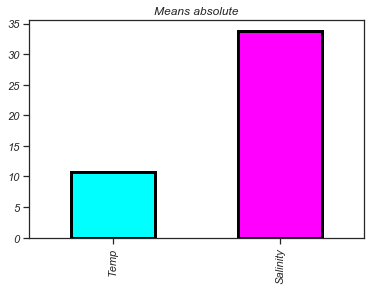

In [273]:
bottle1_desc.loc['mean', :].plot.bar(color=['cyan', 'magenta'], title='Means absolute', 
                                            edgecolor='black', linewidth=3)
plt.show()

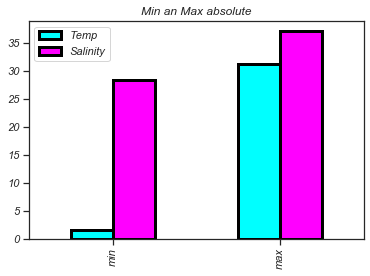

In [272]:
bottle1_desc.loc[['min','max'], :].plot.bar(color=['cyan', 'magenta'], title='Min an Max absolute', 
                                            edgecolor='black', linewidth=3)
plt.show()

The ranges are not strongly different but different.
Scaling can support better outcomes.

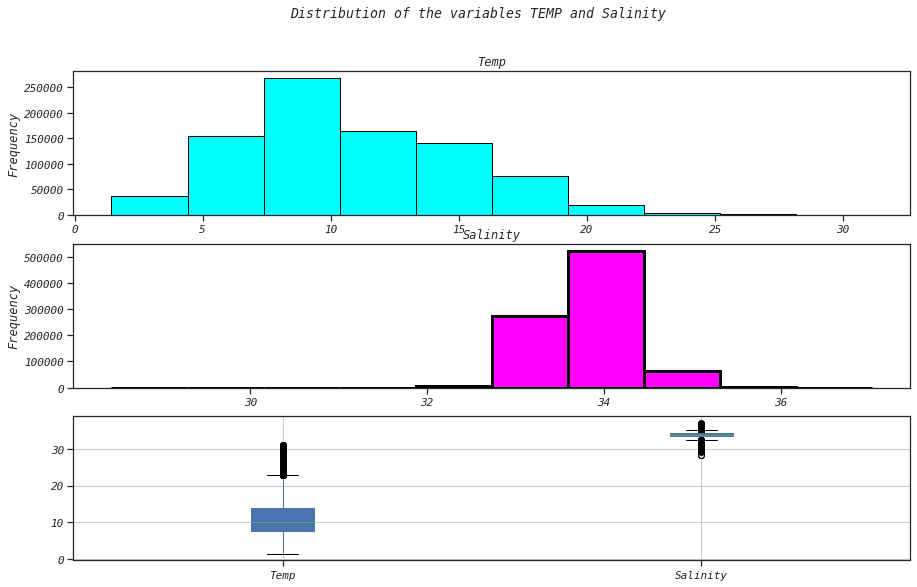

In [177]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,9))

plt.suptitle('Distribution of the variables TEMP and Salinity')
# plt.subplots_adjust(bottom=0.0, right=0.5, top=0.01)

bottle1.Temp.plot.hist(ax=ax1, edgecolor='black', color='cyan',
                           title='Temp')
bottle1.Salinity.plot.hist(ax=ax2, edgecolor='black', linewidth=3, color='magenta',
                           title='Salinity')

kwargs = dict(marker='o', markerfacecolor='green', markersize=12, linestyle='none')
bottle1.boxplot(ax=ax3,  patch_artist=True)
plt.show()

In [178]:
bottle1.loc[0].value_counts()

33.44    1
10.50    1
Name: 0, dtype: int64

In [179]:
print('Temp unique count:', pd.Series(bottle1.loc[:, 'Temp'].unique()).count())
print('Salinity unique count:', pd.Series(bottle1.loc[:, 'Salinity'].unique()).count())

Temp unique count: 13847
Salinity unique count: 14602


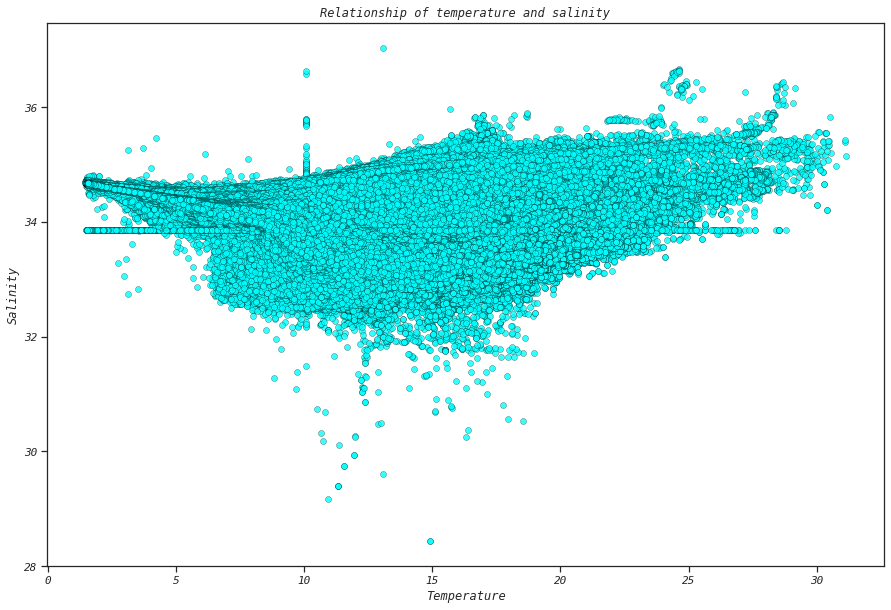

In [180]:
fig = plt.figure(figsize=(15,10))
plt.scatter(bottle1['Temp'], bottle1['Salinity'], color='cyan', alpha=0.8,
            edgecolor='black', linewidth=0.3)

plt.title("Relationship of temperature and salinity")
plt.xlabel('Temperature')
plt.ylabel('Salinity')
# plt.xticks(())
# plt.yticks(())

plt.show()

In [181]:
bottle2 = bottle1.copy()
print(bottle1.shape)
# DataFrame.drop_duplicates(self, subset=None, keep='first', inplace=False)
bottle2 = bottle2.drop_duplicates()
print(bottle2.shape)

(864863, 2)
(520529, 2)


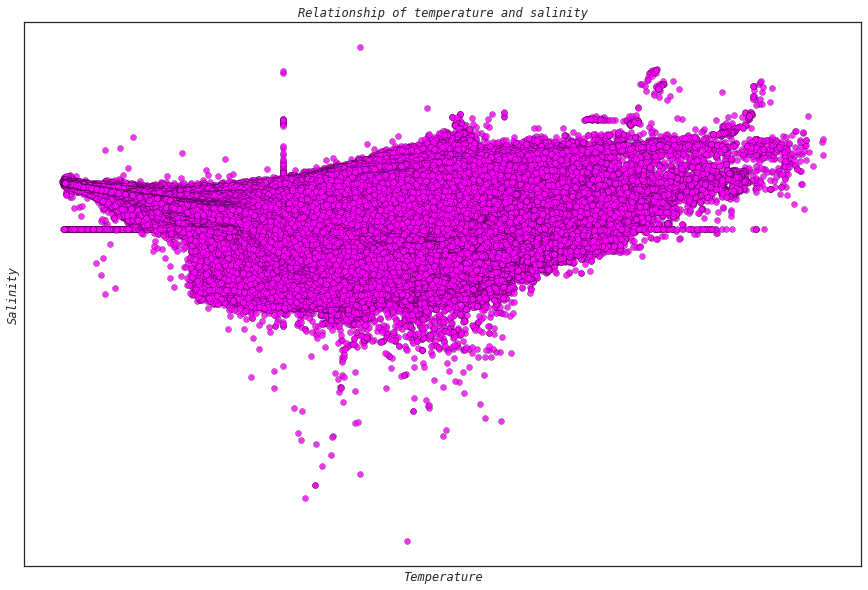

In [182]:
fig = plt.figure(figsize=(15,10))
plt.scatter(bottle2['Temp'], bottle2['Salinity'], color='magenta', alpha=0.8,
            edgecolor='black', linewidth=0.3)

plt.title("Relationship of temperature and salinity")
plt.xlabel('Temperature')
plt.ylabel('Salinity')
plt.xticks(())
plt.yticks(())

plt.show()

There is not an immediate linear relationship between temperature and salinity 
recognizable. Given that the whole data set consists of ca. 70 variables 
maybe contributing to salinity this could be expected. Even without 
domain knowledge temperature alone maybe not a good predictior of salinity.
Salinity does exist in warm and cold water alike.

Taking a random sample of n = 1000 to make the relatioship more obvious

In [183]:
bottle2_randomsubset = bottle2.sample(n=1000)
print(bottle2_randomsubset.shape)
print(bottle2_randomsubset.info())

(1000, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 33026 to 354890
Data columns (total 2 columns):
Temp        1000 non-null float64
Salinity    1000 non-null float64
dtypes: float64(2)
memory usage: 23.4 KB
None


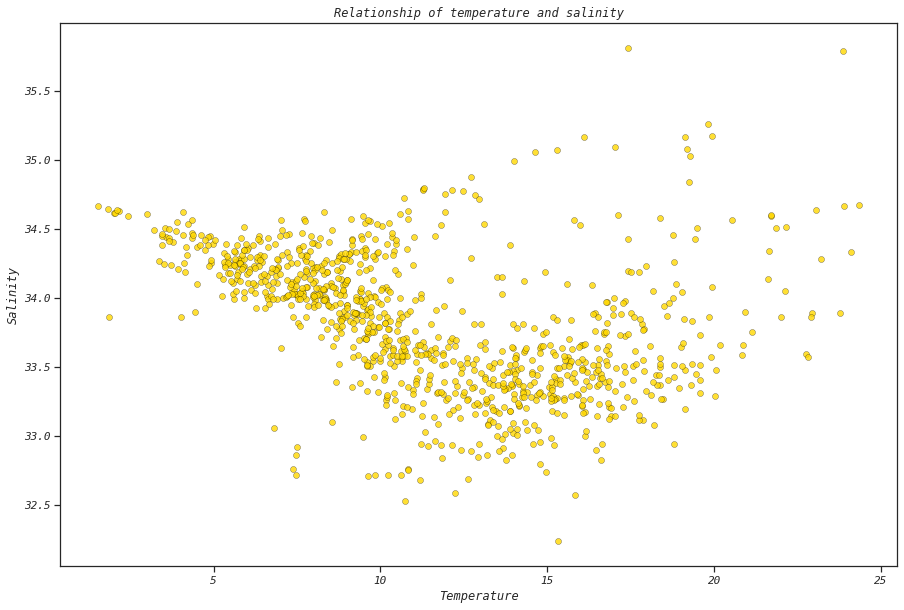

In [184]:
fig = plt.figure(figsize=(15,10))
plt.scatter(bottle2_randomsubset['Temp'], bottle2_randomsubset['Salinity'], color='gold', alpha=0.8,
            edgecolor='black', linewidth=0.3)

plt.title("Relationship of temperature and salinity")
plt.xlabel('Temperature')
plt.ylabel('Salinity')


plt.show()

In this sample a negative linear relationship is more obvious.

## Data preprocessing

In [185]:
# labels or response variable
salinity = bottle1.Salinity
print(len(salinity))
print(salinity.dtype)
# feature
temperature = bottle1.Temp
print(len(temperature))
print(temperature.dtype)

864863
float64
864863
float64


### Train-test-split

In [186]:
X_train, X_test, y_train, y_test = \
train_test_split(temperature, salinity, test_size=0.33, random_state=42)

### Scaling

is done after the split, because otherwise information could be leaked from the testset into the training data
during the training phase.

In [187]:
X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

scaler = StandardScaler().fit(X_train)
scaled_xtrain = scaler.fit_transform(X_train)
scaled_xtest = scaler.fit_transform(X_test) 

print(type(scaled_xtrain))
print(scaled_xtrain.shape)
print(scaled_xtrain[:5])

# output is normaly not scaled
# https://stats.stackexchange.com/questions/111467/
# Is it necessary to scale the target value in addition to scaling features for regression analysis?

<class 'numpy.ndarray'>
(579458, 1)
[[ 0.73935079]
 [-0.68382022]
 [-1.26020448]
 [-1.13449104]
 [ 1.01212523]]


In [188]:
a233=pd.DataFrame(X_train).describe()
b233=pd.DataFrame(X_test).describe()
df233 = pd.concat([a233, b233], axis=1)
df233.columns = ['temp', 'salinity']
df233

,temp,salinity
count,579458.000000,285405.000000
mean,10.782943,10.805239
std,4.215941,4.221095
min,1.440000,1.440000
25%,7.710000,7.730000
50%,10.060000,10.060000
75%,13.830000,13.840000
max,31.140000,31.120000


## Data modeling with simple linear regression

### Linear regression with scikit as base model

In [189]:

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# The root mean squared error
print("Root mean squared error: %.2f"
      % np.sqrt(mean_squared_error(y_test, y_pred)))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))




Coefficients: 
 [-0.05224017]
Mean squared error: 0.15
Root mean squared error: 0.39
Variance score: 0.24


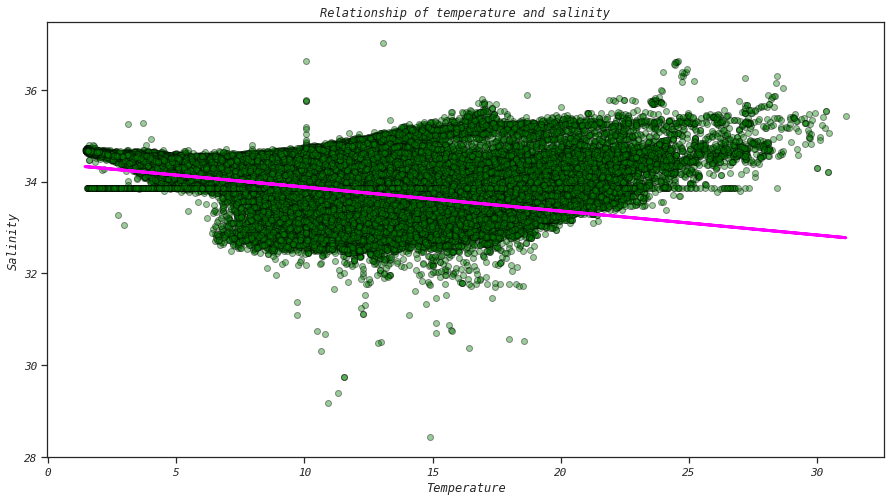

In [190]:
# Plot outputs
fig = plt.figure(figsize=(15,8))
plt.scatter(X_test, y_test,  color='green', alpha=0.4, edgecolor='black')
plt.plot(X_test, y_pred, color='magenta', linewidth=3)
plt.title("Relationship of temperature and salinity")
plt.xlabel('Temperature')
# xticks are scales
plt.ylabel('Salinity')
# yticks are scales

plt.show()

#### Is the linear relationship clearer on a random subset without duplicates?

In [191]:
lin = LinearRegression()
lin.fit(np.array(bottle2_randomsubset['Temp']).reshape(-1, 1),
        np.array(bottle2_randomsubset['Salinity']).reshape(-1, 1) )
salinity_predictions = \
lin.predict(np.array(bottle2_randomsubset['Temp']).reshape(-1, 1))
salinity_predictions[:10]

array([[33.71282954],
       [33.72936736],
       [33.97941568],
       [34.06727283],
       [33.64392198],
       [33.59525601],
       [33.93376442],
       [33.87777702],
       [33.74383795],
       [34.02980434]])

In [192]:
print("Root Mean squared error: %.2f"
      % np.sqrt(mean_squared_error(np.array(bottle2_randomsubset['Temp']).reshape(-1, 1), 
                                   salinity_predictions)))

Root Mean squared error: 22.81


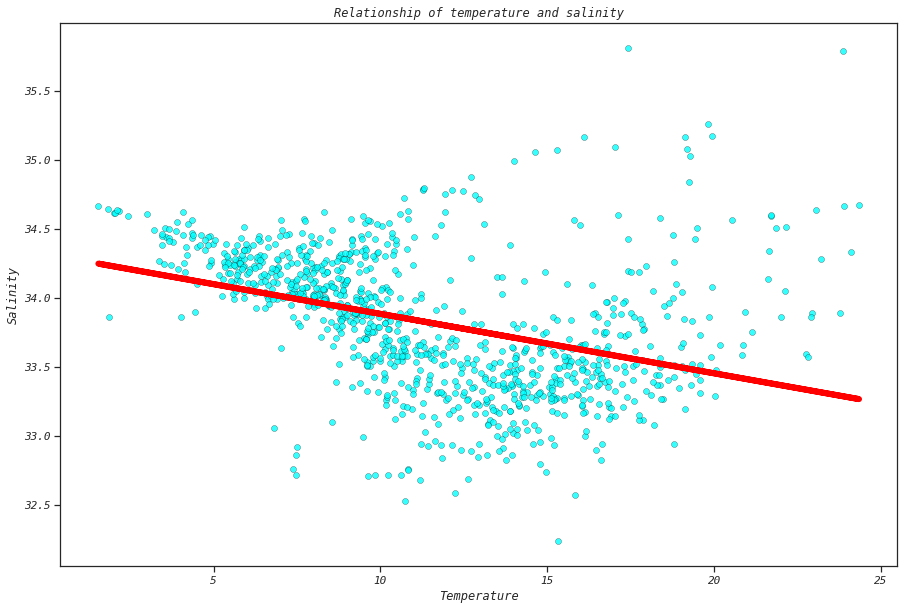

In [193]:
fig = plt.figure(figsize=(15,10))
plt.scatter(bottle2_randomsubset ['Temp'], bottle2_randomsubset ['Salinity'], 
            color='cyan', alpha=0.8,
            edgecolor='black', linewidth=0.3)
plt.plot(bottle2_randomsubset ['Temp'] ,salinity_predictions, color='red', linewidth='6')
plt.title("Relationship of temperature and salinity")
plt.xlabel('Temperature')
plt.ylabel('Salinity')

plt.show()

A mean squared error of 0.76 on scaled data is high. 
Given a data set of ca. 70 variables a simple linear regression 
with only one feature might not be a good enough predictor.
This holds true when applying deep learning models on this
regression problem. However are the deep learning models produce lower
mean squared error values?

### Deep Learning models on a simple linear regression problem
<p> 
Before developing deep learning models,
understanding the complexity of deep learning models is helpful.
Deep learning models are developed by building some simple neural networks adding sequentially layer after layer to the model instance increasing thereby the complexity.
</p> 

In [194]:

model1 = Sequential()

model1.add(Dense(5, input_shape=(3, ), activation='relu'))
model1.add(Dense(1))           

model1.summary()

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_372 (Dense)            (None, 5)                 20        
_________________________________________________________________
dense_373 (Dense)            (None, 1)                 6         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


The input layer of model1 has got an input_shape of 3 features or variables. It has has 5 neuron or connections for each feature from the input layer to the 5 nodes of the first hidden layer. This makes 3 x 5 = 15 input parameters. The first layer has got also 5 outputs neurons to the output layer. This makes 15 + 5 =20 parameters.The output layer has only one neuron. This makes 1 + 5 = 6 parameters at this layer and a total of 26 parameters.


#### Plot model plots the graph of the model

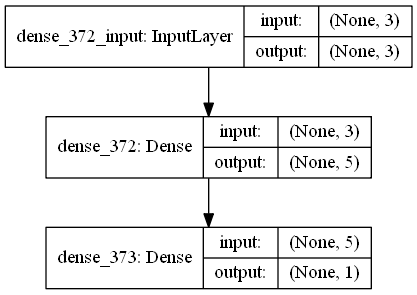

In [195]:
# import pydot as pyd
# from keras.utils.vis_utils import model_to_dot
# keras.utils.vis_utils.pydot = pyd

plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [196]:
model2 = Sequential()

model2.add(Dense(5, input_shape=(3,), activation='relu'))
model2.add(Dense(3))
model2.add(Dense(2))

model2.summary()

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_374 (Dense)            (None, 5)                 20        
_________________________________________________________________
dense_375 (Dense)            (None, 3)                 18        
_________________________________________________________________
dense_376 (Dense)            (None, 2)                 8         
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


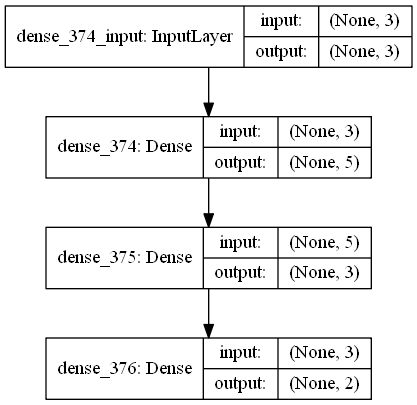

In [197]:
# makes a graphic visualization
plot_model(model2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

The input layer of model2 has got an input_shape of 3 features or variables. 
It has has 5 neuron or connections for each feature from the input layer to 
the 5 nodes of the first hidden layer. 
This makes 3 x 5 = 15 input parameters. 
The first layer has got also 5 outputs neurons to the output layer. 
This makes 15 + 5 =20 parameters.The output layer consists 3 neurons. 
This makes 3 + 15 = 18 parameters at this layer.

In [198]:
model3 = Sequential()

model3.add(Dense(10, input_shape=(2,), activation='relu', ))
model3.add(Dense(10))
model3.add(Dense(1))

A way to understand the model complexity is to look at the 
output shape and the number of parameters created.

In [199]:
model3.summary()

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_377 (Dense)            (None, 10)                30        
_________________________________________________________________
dense_378 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_379 (Dense)            (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


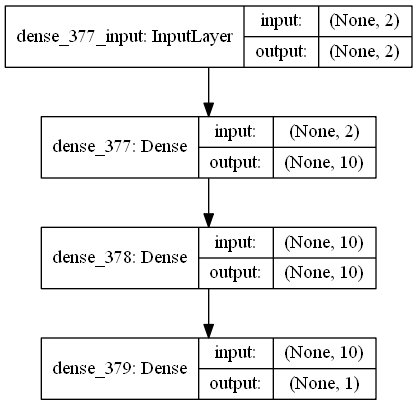

In [200]:
plot_model(model3, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

The input layer of model3 has got an input_shape of 2 features 
or variables. It has has 10 neuron or connections 
for each feature from the input layer to the 10 nodes of the first hidden layer. 
This makes 2 x 10=20 input parameters. The first layer has got also 
10 outputs neurons to each of the ten 10 nodes of the second layer. 
This makes 20+10=30 parameters.
The second layer has got 10 x 10 = 100 input neurons and 10 output neurons
to the output layer, which makes 110 parameters. 
In the output layer are 11 parameters with ten input neurons and 1 output neuron.


### Linear regression with Deep Learning models

<p>
In linear regression as in any other case deep learning modelscost or loss functions measure the performance of a model by determining
the difference (cost) between observed and predicted values.
The cost function here uses the mean-squared-error-metric, which
fits good with linear regression problems.
</p> 

<p>
The process of measurement is ongoing iterative.
The loss function is applied over and over again, 
but determining the cost is not enough.
You want to get the optimal or lowest cost.
This is the job of the optimizer-algorithm (e.g. optimal gradient descent) by trying out numerous combinations of hyperparameters (weights, learning rates) to establish the optimal combination measured in terms of cost.
</p> 

<p>
Different optimizers are working better for different prediction problems.
It is the task of the model designer to figure out the best optimizer by
understanding the algorithms but also by testing those at the problem.
</p> 

<p>
The optimizer used in model 4 is the adaptive moment estimation optimizer or Adam,
which calculates particular learning rates for different parameter combinations.
</p> 


#### Deep Learning model using the data without train-test-split


#### Deep Learning: model 4

In [201]:
model4 = Sequential()

# input shape = 1 - temp
model4.add(Dense(50, activation='relu', input_shape=(1,)))
model4.add(Dense(50, activation='relu', kernel_initializer='normal'))
model4.add(Dense(50, activation='relu', kernel_initializer='normal'))
model4.add(Dense(50, activation='relu'))
# final output shape = 1 - salinity
model4.add(Dense(1))

The output is one neuron as only one value (float) is expected. This is other than in
multiple or binary classification problems. This is important to keep in mind.

#### Plotting the graph of the model

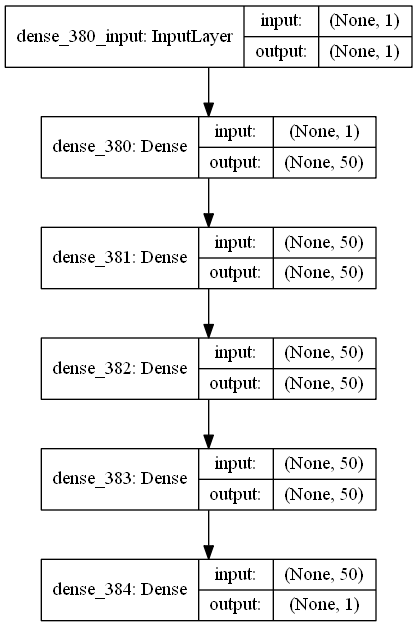

In [202]:
plot_model(model4, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### Using callbacks

<p>
<b>According to the doc</b>:<br> 
A callback is a set of functions to be applied at given stages of the training procedure. 
You can use callbacks to get a view on internal states and statistics of the model during training. 
You can pass a list of callbacks (as the keyword argument callbacks) to the .fit() 
method of the Sequential or Model classes. 
The relevant methods of the callbacks will then be called at each stage of the training. 
<a href="https://keras.io/callbacks/#modelcheckpoint">Keras: Usage of callbacks</a> 
</p>

<p>
On practical grounds callbacks are very helpful to reduce model complexity and spare computing resources.
</p>




In [203]:
# Early stop on validation accuracy
monitor_valloss_4 = EarlyStopping(monitor='val_loss', patience=3)

# Save the best model as 'dl_model4_check.hdf5'
modelCheckpoint_4 = ModelCheckpoint('dl_model4_check.hdf5', save_best_only=True)

In [204]:
model4.compile(optimizer='adam', loss='mse', metrics=['mse'])

# model.fit(x_train, y_train, epochs=30, batch_size=128)
History = model4.fit(temperature, salinity, epochs=30, batch_size=len(temperature/1000),
                     verbose=0, validation_split=0.25,
                     callbacks=[monitor_valloss_4, modelCheckpoint_4],
                     validation_data=(temperature, salinity))

In [205]:
# score = model.evaluate(x_test, y_test, batch_size=128)
score1 = model4.evaluate(temperature, salinity , len(temperature/1000))

864863/864863 [==============================] - 1s 1us/step


In [206]:
print(History.history.keys())
print(History.history.get('val_loss')[:5])
History_df = pd.DataFrame(History.history)
print(History_df.head())

dict_keys(['val_loss', 'val_mse', 'loss', 'mse'])
[1153.678955078125, 1148.9136962890625, 1145.053955078125, 1141.968505859375, 1139.731689453125]
      val_loss      val_mse         loss          mse
0  1153.678955  1153.678955  1159.336914  1159.336914
1  1148.913696  1148.913696  1153.679077  1153.679077
2  1145.053955  1145.053955  1148.913696  1148.913696
3  1141.968506  1141.968506  1145.053955  1145.053955
4  1139.731689  1139.731689  1141.968506  1141.968506


In [207]:
History.history.get('val_loss')[:5]

[1153.678955078125,
 1148.9136962890625,
 1145.053955078125,
 1141.968505859375,
 1139.731689453125]

#### Plotting the learning curves based on model loss and mse

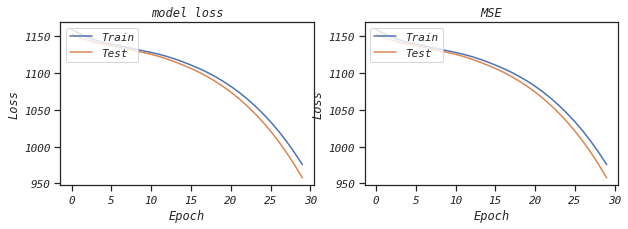

In [208]:
fig = plt.figure(figsize=(10,3))

ax = fig.add_subplot(1,2,1)
# Plot training & validation loss values
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


ax = fig.add_subplot(1,2,2)
# Plot training & validation loss values
plt.plot(History.history['mse'])
plt.plot(History.history['val_mse'])
plt.title('MSE')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

Model uses the mse and that is why both plot are identical.

In [209]:
print(model4.metrics_names)
print(score1)

model4_rmse = round(np.sqrt(score1[1]), 2)
print('rmse: ', model4_rmse)

['loss', 'mse']
[957.615966796875, 957.615966796875]
rmse:  30.95


#### Making predictions

In [210]:
model4_pred = model4.predict(salinity[100:125]).flatten()

print(model4_pred.shape)
print(model4_pred[:10])
print(type(model4_pred))


(25,)
[8.441208 8.485533 8.51884  8.565419 8.627275 8.631533 8.680616 8.704158
 8.709916 8.71668 ]
<class 'numpy.ndarray'>


#### Deep Learning: model 5 using the adam-optimizer.

In [211]:
model5 = Sequential()

# input shape = 1 - temp
model5.add(Dense(50, activation='relu', input_shape=(1,)))
model5.add(Dense(50, activation='relu'))
model5.add(Dense(50, activation='relu'))
model5.add(Dense(50, activation='relu'))
# final output shape = 1 - salinity
model5.add(Dense(1))

#### Plot the graph of the model 5

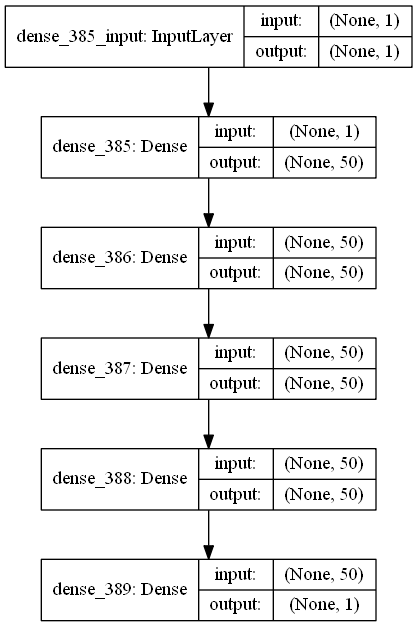

In [212]:
plot_model(model5, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [213]:
# Early stop on validation accuracy
monitor_valloss_5 = EarlyStopping(monitor='val_loss', patience=3)

# Save the best model as 'dl_model4_check.hdf5'
modelCheckpoint_5 = ModelCheckpoint('dl_model5_check.hdf5', save_best_only=True)

In [214]:

model5.compile(optimizer='adam', loss='mse', metrics=['mse'])

# model.fit(x_train, y_train, epochs=20, batch_size=128)
History2 = model5.fit(X_train, y_train, epochs=30, batch_size=1000,
                     verbose=0, validation_split=0.25,
                     callbacks=[monitor_valloss_5, modelCheckpoint_5],
                     validation_data=(X_test, y_test))

In [215]:
score5 = model5.evaluate(X_test, y_test , batch_size=1000)

285405/285405 [==============================] - 3s 9us/step


In [216]:
print(History2.history.keys())
print(History2.history.get('val_loss')[:5])
History2_df = pd.DataFrame(History2.history)
print(History2_df.head())

dict_keys(['val_loss', 'val_mse', 'loss', 'mse'])
[0.21221493104371045, 0.12068129397193982, 0.11598345281336671, 0.1104645797771457, 0.10883327344450845]
   val_loss   val_mse        loss         mse
0  0.212215  0.212215  115.487656  115.487732
1  0.120681  0.120681    0.151319    0.151318
2  0.115983  0.115983    0.116955    0.116955
3  0.110465  0.110465    0.115510    0.115510
4  0.108833  0.108833    0.113359    0.113359


An epoch is number of times the data set is passed forward and backward through the
entire network (propagated).
It is essentially the number of times the algorithm is applied to
the data. 
Within one epoch the data set can be splitted into batches (samples) for practical,
economic reasons, for example to save memory.<br>
<a href=https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network>
More on batch size here on Stackexchange
</a> 




In [217]:
score5_round =[round(i, 2) for i in score5]
print(model5.metrics_names,':', score5_round)

['loss', 'mse'] : [0.11, 0.11]


#### Plotting the learning curves based on model loss and mse

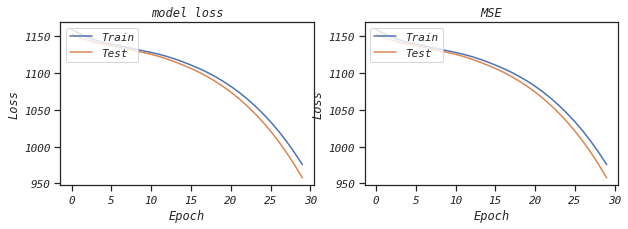

In [218]:
fig, (ax1, ax2) = plt.subplots(1 ,2, figsize=(10,3))


# Plot training & validation loss values
ax1.plot(History.history['loss'])
ax1.plot(History.history['val_loss'])
ax1.set_title('model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax2.plot(History.history['mse'])
ax2.plot(History.history['val_mse'])
ax2.set_title('MSE')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Test'], loc='upper left')

plt.show()

In both cases minimal values are better.

#### Making predictions

In [219]:
model5_pred = model5.predict(X_test[100:125]).flatten()

print(model5_pred.shape)
print(model5_pred[:10])
print(type(model5_pred))
print(X_test[100:125].shape)
print(type(X_test[100:125]))

model5_dict = {'observed': X_test[100:125].flatten(), 'predictions': model5_pred}                  
model5_df = pd.DataFrame(model5_dict ).reset_index(drop='True')                             
model5_df['diff'] = model5_df.observed - model5_df.predictions
model5_df.head(n=5)

(25,)
[33.734505 33.31254  33.565365 33.30804  33.532093 34.085884 33.676506
 33.803364 33.32496  33.465847]
<class 'numpy.ndarray'>
(25, 1)
<class 'numpy.ndarray'>


,observed,predictions,diff
0,9.98,33.734505,-23.754505
1,13.69,33.312538,-19.622538
2,11.38,33.565365,-22.185365
3,13.51,33.308041,-19.798041
4,18.43,33.532093,-15.102093


#### Deep Learning: model 6 using the optimizer='rmsprop'

In [220]:
model6 = Sequential()
# input shape = 1 - temp
model6.add(Dense(60, activation='relu', input_shape=(1,)))
model6.add(Dense(60, activation='relu'))
model6.add(Dense(60, activation='relu'))
model6.add(Dense(60, activation='relu'))
# final output shape = 1 - salinity
model6.add(Dense(1))

plot_model(model6, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Early stop on validation accuracy
monitor_valloss_6 = EarlyStopping(monitor='val_loss', patience=3)

# Save the best model as 'dl_model6_check.hdf5'
modelCheckpoint_6 = ModelCheckpoint('dl_model6_check.hdf5', save_best_only=True)

# For a mean squared error regression problem
model6.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

# model.fit(x_train, y_train, epochs=50, batch_size=1000)
History3 = model6.fit(X_train, y_train, epochs=50, batch_size=1000,
                     verbose=0, validation_split=0.25,
                     callbacks=[monitor_valloss_6, modelCheckpoint_6],
                     validation_data=(X_test, y_test))

History3_df = pd.DataFrame(History3.history)
print(History3_df.head())


   val_loss   val_mse       loss        mse
0  4.915872  4.915874  60.992273  60.992226
1  2.510888  2.510887   3.424267   3.424265
2  1.836082  1.836081   2.535679   2.535679
3  2.092531  2.092530   2.016172   2.016171
4  1.604250  1.604249   1.702903   1.702904


#### Plotting the learning curves based on model loss and mse

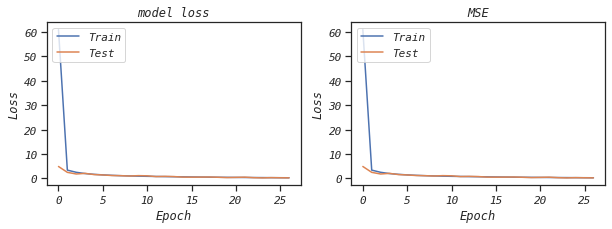

In [221]:
fig, (ax1, ax2) = plt.subplots(1 ,2, figsize=(10,3))


# Plot training & validation loss values
ax1.plot(History3.history['loss'])
ax1.plot(History3.history['val_loss'])
ax1.set_title('model loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
ax2.plot(History3.history['mse'])
ax2.plot(History3.history['val_mse'])
ax2.set_title('MSE')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [222]:

score6 = model6.evaluate(X_test, y_test )
print(model6.metrics_names,':', score6)

285405/285405 [==============================] - 43s 152us/step
['loss', 'mse'] : [0.25843335566531384, 0.25843316316604614]


The simple deep learning model applied here has reduced the 
mse of the mse of the sklearn Linear Regression model from 0.76 to
0.335. This is an improvement and furthers improvements throug layer configuration and
addtional epochs might be possible. Given this was only 
a simple linear regression model, in the next step a deep learning model
is applied to a multiple linear regression problem using the same data set.

#### Making predictions

In [223]:
model6_pred = model6.predict(X_test[100:126]).flatten()

print(model6_pred.shape)
print(model6_pred[:10])
print(type(model6_pred))
print(X_test[100:126].shape)
print(type(X_test[100:126]))

model6_dict = {'observed': X_test[100:126].flatten(), 'predictions': model6_pred}                  
model6_df = pd.DataFrame(model6_dict ).reset_index(drop='True')                             
model6_df['diff'] = model6_df.observed - model6_df.predictions
model6_df.head(n=5)

(26,)
[33.409054 33.00844  33.191826 33.009586 33.3304   33.788708 33.334843
 33.50965  33.01048  33.21711 ]
<class 'numpy.ndarray'>
(26, 1)
<class 'numpy.ndarray'>


,observed,predictions,diff
0,9.98,33.409054,-23.429054
1,13.69,33.008438,-19.318438
2,11.38,33.191826,-21.811826
3,13.51,33.009586,-19.499586
4,18.43,33.330399,-14.900399


## Data import

In [224]:
fullbottle = pd.read_csv("calcofi/bottle.csv", header=0, parse_dates=True, 
                     infer_datetime_format=True, low_memory=False)


## Data exploration & cleaning

In [225]:
fullbottle = fullbottle.dropna(subset=['Salnty'])

In [226]:
print(fullbottle.shape)
# print(fullbottle.info())
# all variables are numerics

(817509, 74)


In [227]:
# target variable, label
print(fullbottle.Salnty.shape)
print(fullbottle.Salnty.isnull().sum())

# salinity_full_2 = salinity_full.fillna(salinity_full.median())
# print(salinity_full_2.shape)

(817509,)
0


In [228]:
cond = fullbottle.isnull().sum() <fullbottle.shape[0] - (fullbottle.shape[0] * 0.8)
print(type(cond))

fullbottle_2 = fullbottle.loc[:, cond]
print(fullbottle_2.shape)
print(fullbottle_2.isnull().sum())

fullbottle_3 = fullbottle_2.dropna(axis=0)
print(fullbottle_3.shape)

fullbottle_5 = fullbottle_3.fillna(fullbottle_3.median())
print(fullbottle_5.shape)

<class 'pandas.core.series.Series'>
(817509, 29)
Cst_Cnt             0
Btl_Cnt             0
Sta_ID              0
Depth_ID            0
Depthm              0
T_degC           3262
Salnty              0
O2ml_L         153314
STheta           5335
O2Sat          156235
Oxy_µmol/Kg    156241
RecInd              0
T_prec           3262
S_prec              0
NH3q            56561
C14A1q          14752
C14A2q          14752
DarkAq          21864
MeanAq          21865
R_Depth             0
R_TEMP           3262
R_POTEMP         4240
R_SALINITY          0
R_SIGMA          5502
R_SVA            5417
R_DYNHT          5911
R_O2           153314
R_O2Sat        155747
R_PRES              0
dtype: int64
(583329, 29)
(583329, 29)


#### Removing redundant columns

In [229]:
fullbottle_5.drop(['R_SALINITY', 'R_TEMP' , 'R_O2Sat', 'C14A2q'], axis=1, inplace=True)

In [230]:
fullbottle_5.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,...,C14A1q,DarkAq,MeanAq,R_Depth,R_POTEMP,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_PRES
count,583329.000000,583329.000000,583329.000000,583329.000000,583329.000000,583329.000000,583329.000000,583329.000000,583329.000000,583329.000000,...,583329.000000,583329.000000,583329.000000,583329.000000,583329.000000,583329.000000,583329.000000,583329.000000,583329.000000,583329.000000
mean,16808.794990,423688.261540,227.857676,10.813761,33.856623,3.343154,25.833333,55.807217,145.626169,4.700738,...,8.999990,8.999990,8.999990,227.857679,10.792141,25.829062,219.168421,0.449993,3.343164,229.382085
std,9966.861924,241757.492163,316.145399,4.257786,0.460058,2.058549,1.007214,36.894726,89.745110,1.974247,...,0.003207,0.003207,0.003207,316.145402,4.274725,1.007182,93.455168,0.388743,2.058549,319.575921
min,71.000000,2161.000000,0.000000,1.440000,29.402000,-0.010000,20.996000,-0.100000,-0.434900,3.000000,...,8.000000,8.000000,8.000000,0.000000,1.100000,20.990000,0.600000,0.000000,-0.010000,0.000000
25%,8773.000000,229857.000000,50.000000,7.710000,33.506000,1.330000,24.987600,20.000000,57.865410,3.000000,...,9.000000,9.000000,9.000000,50.000000,7.680000,24.980000,143.000000,0.160000,1.330000,50.000000
50%,14821.000000,394944.000000,125.000000,10.010000,33.890000,3.340000,26.031000,52.100000,145.395700,3.000000,...,9.000000,9.000000,9.000000,125.000000,9.990000,26.030000,199.400000,0.360000,3.340000,126.000000
75%,26459.000000,646072.000000,300.000000,13.860000,34.200000,5.450000,26.652000,96.300000,237.596500,7.000000,...,9.000000,9.000000,9.000000,300.000000,13.860000,26.650000,297.400000,0.650000,5.450000,302.000000
max,34404.000000,864861.000000,5351.000000,31.140000,37.034000,9.950000,27.954000,191.500000,433.270300,7.000000,...,9.000000,9.000000,9.000000,5351.000000,31.140000,27.950000,677.400000,3.880000,9.950000,5458.000000


In [231]:
fullbottle_5.describe().loc['mean', :]

Cst_Cnt         16808.794990
Btl_Cnt        423688.261540
Depthm            227.857676
T_degC             10.813761
Salnty             33.856623
O2ml_L              3.343154
STheta             25.833333
O2Sat              55.807217
Oxy_µmol/Kg       145.626169
RecInd              4.700738
T_prec              2.003885
S_prec              2.782012
NH3q                8.930168
C14A1q              8.999990
DarkAq              8.999990
MeanAq              8.999990
R_Depth           227.857679
R_POTEMP           10.792141
R_SIGMA            25.829062
R_SVA             219.168421
R_DYNHT             0.449993
R_O2                3.343164
R_PRES            229.382085
Name: mean, dtype: float64

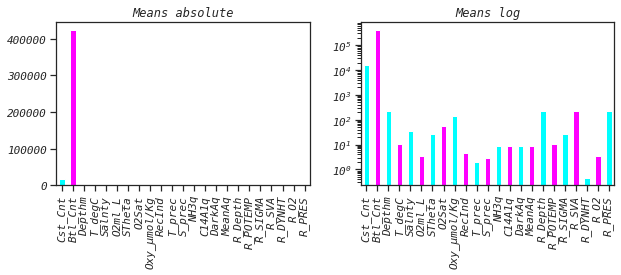

In [232]:
fig = plt.figure(figsize=(10,3))
fig.add_subplot(1,2,1)
fullbottle_5.describe().loc['mean', :].plot.bar(color=['cyan', 'magenta'], 
                                                title='Means absolute')
fig.add_subplot(1,2,2)
fullbottle_5.describe().loc['mean', :].plot.bar(color=['cyan', 'magenta'], logy=True,
                                                title='Means log')
plt.show()

In [233]:
fullbottle_6 = fullbottle_5.fillna(fullbottle_5.median())
fullbottle_6.isna().sum().sum()

0

Two variables are in a wider range and could distort the process.
Standardization is therefore advisable.

In [234]:
full_id = fullbottle_6[['Sta_ID' , 'Depth_ID']]
full_id.dtypes
full_id.head(2)

,Sta_ID,Depth_ID
2160,044.0 048.5,19-4904CR-HY-087-0606-04400485-0000B-3
2162,044.0 048.5,19-4904CR-HY-087-0606-04400485-0010A-7


In [235]:
fullbottle_6.drop(['Sta_ID' , 'Depth_ID'], axis=1, inplace=True )

#### Feature variables

In [236]:
fullfeatures = fullbottle_6.drop('Salnty', axis=1)
print(fullfeatures.shape)
print(fullbottle_6.shape)

(583329, 22)
(583329, 23)


An excellent way to visualize pair scatter relationships are pairplots. 
However those are computational strenuous.
For this reason a sample and a subset is taken here before.

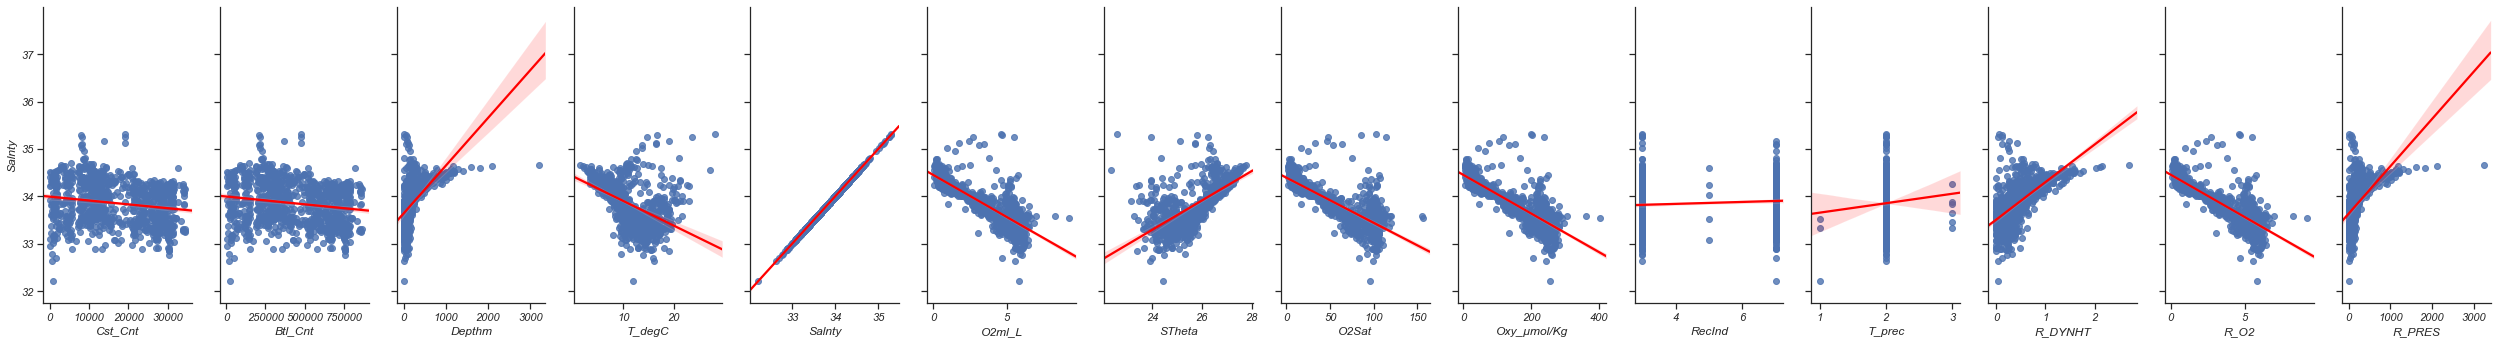

In [237]:
#print(fullbottle_6.columns)
sample6 = fullbottle_6.sample(n=1000, random_state=12)


sns.set(style="ticks", color_codes=True)
sns.pairplot(data=sample6, palette='icefire', 
             x_vars=['Cst_Cnt', 'Btl_Cnt', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta',
                    'O2Sat', 'Oxy_µmol/Kg', 'RecInd', 'T_prec',
                    'R_DYNHT', 'R_O2', 'R_PRES'], 
             aspect=0.5, height=5,
             y_vars=['Salnty'], kind='reg',
             plot_kws={'line_kws':{'color':'red'}})
plt.show()

#### Target variable: salinity

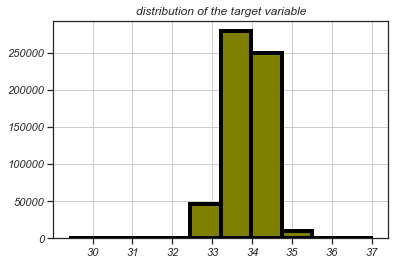

In [238]:
fullsalinity = fullbottle_6.Salnty
fullsalinity.hist(edgecolor='black', linewidth=4, color='olive')
plt.title('distribution of the target variable')
plt.show()

In [239]:
fullsalinity_df = pd.DataFrame(fullsalinity).reset_index(drop=True)
fullsalinity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583329 entries, 0 to 583328
Data columns (total 1 columns):
Salnty    583329 non-null float64
dtypes: float64(1)
memory usage: 4.5 MB


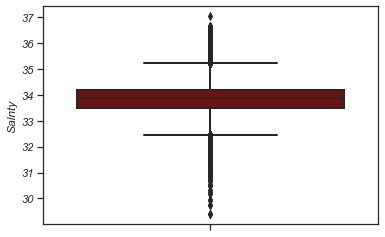

In [240]:
# box plots need the df structure
ax = sns.boxplot(x=fullsalinity_df["Salnty"], color='maroon', orient='v', linewidth=2)

There is a suspicion of outliers.

### Data preprocessing

#### Train-test-split

In [241]:
X_train_2, X_test_2, y_train_2, y_test_2 = \
train_test_split(fullfeatures, fullsalinity, random_state=43, test_size=0.33)

print(type(X_train_2))

<class 'pandas.core.frame.DataFrame'>


#### Scaling

<p>
is done after the train-test-split, because otherwise information like the
mean and variance of the label would be "leaked" to the training data.<br>
<a href="https://stats.stackexchange.com/questions/77350/perform-feature-normalization-before-or-within-model-validation">Cross Validated: Perform feature normalization before or within model validation?</a> 
</p> 

In [242]:
scaler2 = StandardScaler().fit(X_train_2)
scaler2_xtrain = scaler2.fit_transform(X_train_2)
scaler2_xtest = scaler2.fit_transform(X_test_2)

print(type(scaler2_xtrain))
print(scaler2_xtrain.shape)
# first feature
print(scaler2_xtest[:1][:1])


<class 'numpy.ndarray'>
(390830, 22)
[[ 1.39094844  1.41922192 -0.34392136 -0.3633594  -0.09530605  0.26594182
  -0.19406988 -0.09647271 -0.86321323 -0.04330239  0.52847339  0.11929342
   0.00394775  0.00394775  0.00394775 -0.34392136 -0.35920145  0.27017948
  -0.2854696  -0.30817511 -0.09531121 -0.34186617]]


### Multiple linear regression with scikit as base model
<p>
From the implementation point of view, this is just plain Ordinary Least Squares (scipy.linalg.lstsq) wrapped as a predictor object.</p> 

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict">Visit Scikit</a> 




In [243]:
# instantiate the linear regression classifier
multireg = LinearRegression()
# fit the training data
multireg.fit(scaler2_xtrain, y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [244]:
multireg_predict = multireg.predict(scaler2_xtest)
print(multireg_predict.shape)
print(multireg_predict[40:45])

(192499,)
[33.44117905 33.93643414 34.02278345 33.56069946 33.76106726]


In [245]:
multireg_dict = {'observed': y_test_2, 'predicted': multireg_predict}
multireg_df = pd.DataFrame(multireg_dict)
multireg_df['residuals'] =  multireg_df.observed - multireg_df.predicted
print(multireg_df.head())

        observed  predicted  residuals
766825    33.752  33.735696   0.016304
26397     33.368  33.395673  -0.027673
215528    34.490  34.501437  -0.011437
724023    33.866  33.849976   0.016024
643358    34.176  34.185849  -0.009849


In [246]:
multireg_rsquared_train = round(multireg.score(scaler2_xtrain, y_train_2), 4)
print('train rsquared: ', multireg_rsquared_train)

multireg_rsquared_test = round(multireg.score(scaler2_xtest, y_test_2), 4)
print('test rsquared: ', multireg_rsquared_test)

train rsquared:  0.9766
test rsquared:  0.9754


R-squared is the proportion of the variance explained in the dependent variable by the independent, 
feature variables. A R-squared of 0.98 is very high and indicates a good fit of the model to the data.

In [247]:
multireg_mse = round(mean_squared_error(y_test_2, multireg_predict), 4)
print(multireg_mse)

multireg_rmse = round(np.sqrt(mean_squared_error(y_test_2, multireg_predict)), 4)
print(multireg_rmse)

0.0052
0.0723


Root mean squared error is the square root of the variance residuals (observed - predicted).
It indicates how close the observed values are to the predicted value.
The lower the R-squared the closer the values are and the better the model fits the data.
A RMSE below 0.1 speaks for good fit.

#### Visualization of observed, actual values and fitted, predicted values

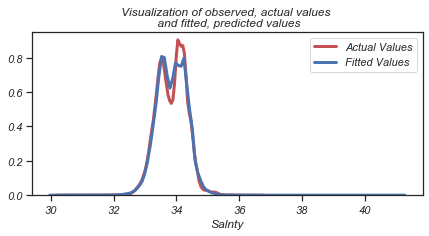

In [248]:
fig, ax1 = plt.subplots(figsize=(7,3))

ax1 = sns.distplot(y_test_2, hist=False, color="r", label="Actual Values", kde_kws={"lw": 3})
ax1 = sns.distplot(multireg_predict, hist=False, color="b", label="Fitted Values",
                   kde_kws={"lw": 3})
ax1.set_title('Visualization of observed, actual values \n and fitted, predicted values')
plt.show()

Both distributions are to a large degree congruent. 
The predictions are good approximations of the observed values.

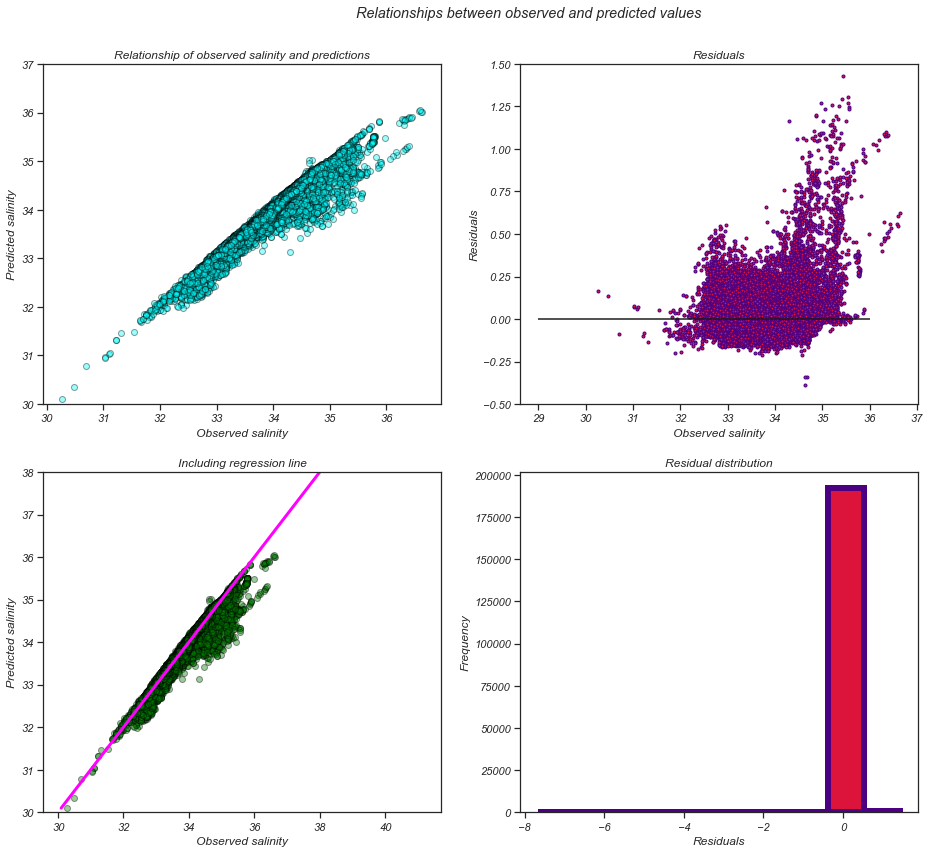

In [249]:

fig, axes = plt.subplots(2, 2, figsize=(18,8))
plt.suptitle('Relationships between observed and predicted values', x=0.5, y=1.4)
plt.subplots_adjust(bottom=0.001, right=0.8, top=1.3)

axes[0,0].scatter(multireg_df['observed'], multireg_df ['predicted'],  color='cyan', alpha=0.4, edgecolor='black')
axes[0,0].set_title("Relationship of observed salinity and predictions")
axes[0,0].set_xlabel('Observed salinity')
axes[0,0].set_ylabel('Predicted salinity')
axes[0,0].set_ylim(30, 37)


axes[0,1].scatter( multireg_df['observed'], multireg_df ['residuals'], marker='.', edgecolor="indigo", color='crimson')
axes[0,1].hlines(y=0, xmin=29, xmax=36)
axes[0,1].set_title("Residuals")
axes[0,1].set_xlabel('Observed salinity')
axes[0,1].set_ylabel('Residuals')
axes[0,1].set_ylim(-0.5, 1.5)


axes[1,0].scatter(multireg_df['observed'], multireg_df['predicted'],  color='green', alpha=0.4, 
                  edgecolor='black')
axes[1,0].plot([ multireg_df['predicted'].min(), multireg_df['predicted'].max()],  
               [ multireg_df['predicted'].min(), multireg_df['predicted'].max()] , color='magenta', linewidth=3)
axes[1,0].set_title("Including regression line")
axes[1,0].set_xlabel('Observed salinity')
axes[1,0].set_ylabel('Predicted salinity')
axes[1,0].set_ylim(30, 38)

axes[1,1].hist(multireg_df['residuals'],  edgecolor="indigo", color='crimson', linewidth=6)
axes[1,1].set_title("Residual distribution")
axes[1,1].set_xlabel('Residuals')
axes[1,1].set_ylabel('Frequency')


plt.show()

Overall the Multiple Linear Regression model performs with a RMSE of 0.0723 very good on this problem and data set.
Are doing deep learning models developed with Keras similar well or even better?

### Deep Learning models on a mutiple linear regression problem

<p>
using a Keras model evaluated with scikit-learn. Keras based on Tensorflow is good at developing
deep learning models, while scikit offers matured evaluation functionality.
The Keras model is "wrapped" into a scikit construct.
It is passed into the scikit wrapper as a function and can than be evaluated
with the functionality offered by scikit.
</p> 

<a href="https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/">
Compare Machinelearningmastery</a> 


Other than above in case of the Linear Regression model
the data is not splitted with a train-test-split now, but will be later splitted using
cross validation. Here only X and y are isolated.
Also to reduce computation time it was necessary to take a random subset of the data set.

In [250]:
full_KR = fullbottle_6.copy()
print(full_KR.shape)

full_KR = full_KR.sample(n=10000, random_state=51)

KRsalinity = full_KR.Salnty.values
print(type(KRsalinity))
print(KRsalinity.shape)

KRfeatures = full_KR.drop('Salnty', axis=1).values
print(type(KRfeatures))
print(KRfeatures.shape)

(583329, 23)
<class 'numpy.ndarray'>
(10000,)
<class 'numpy.ndarray'>
(10000, 22)


In [251]:
# input dimension in the first layers is equal to the number of variables
Xtrain2_cols = scaler2_xtrain.shape[1]
print(Xtrain2_cols)

22


In [252]:
def base_regression():
    model101 = Sequential()
    model101.add(Dense(22, input_dim=22, activation='relu', kernel_initializer='normal'))
    
    model101.add(Dense(60, activation='relu', input_shape=(1,)))
    model101.add(Dense(60, activation='relu'))
    model101.add(Dense(60, activation='relu'))
    model101.add(Dense(60, activation='relu'))

    model101.add(Dense(1, kernel_initializer='normal'))
    
    model101.compile(loss=['mean_squared_error'], optimizer='adam', metrics=['mean_squared_error', metrics.mae])
    return model101

The KerasRegressors offers besides the main function (build_fn - callable function or class instance) for passing in the model some familiar arguments known from fitting a model in Keras.

#### Creating a pipeline of steps 
<p>
transforming the input data, generating the output data, and evaluating it with 
a cross-validation-instance. The pipeline method makes it easily possible to
standardize the data within each k-fold and prevent this way leaking 
test data in the training phase, which would be the case, when standardizing
the whole data set at once taking mean and standard deviation overall.
</p> 
<p>
<b>In words of the doc:</b><br>
The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.
</p> 


#### Using the KerasRegressor wrapper for the Scikit-Learn API

In [253]:
regression_classifiers = []
regression_classifiers.append(('standardize', StandardScaler()))
regression_classifiers.append(('mlp', KerasRegressor(build_fn=base_regression, 
                                                     epochs=25, batch_size=1000, verbose=0)))
pipeline = Pipeline(regression_classifiers)

print(regression_classifiers)
print(pipeline)

[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', <keras.wrappers.scikit_learn.KerasRegressor object at 0x0000016812646988>)]
Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlp',
                 <keras.wrappers.scikit_learn.KerasRegressor object at 0x0000016812646988>)],
         verbose=False)


In [254]:
kfold = KFold(n_splits=10)
outcomes = cross_val_score(pipeline, KRfeatures , KRsalinity, cv=kfold)

print("mean of standardized data:{} , std of standardized data: {}".format(outcomes.mean(), outcomes.std()))

mean of standardized data:-3.2033854007720945 , std of standardized data: 0.9244150925338678


In [255]:
print(outcomes)
outcomes_pd = pd.Series(abs(outcomes))

outcomes_mse = outcomes.mean() 
outcomes_std = outcomes.std()
outcomes_rmse = np.sqrt(abs(outcomes.mean()))

[-3.97838616 -5.43320799 -2.82377505 -2.78753352 -2.33599138 -2.36105108
 -3.32710147 -2.64162397 -3.82871032 -2.51647305]


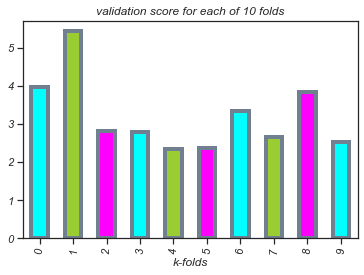

In [256]:
outcomes_pd.plot(kind='bar', color=['aqua', 'yellowgreen', 'fuchsia'],
                edgecolor='slategray', linewidth=4,
                title="validation score for each of 10 folds")
plt.xlabel("k-folds")
plt.show()

In [257]:
print("Baseline model: mean-squared-error: {}, root-mean-squared-error: {}, standard deviation: {}".format(outcomes.mean(), np.sqrt(abs(outcomes.mean())), outcomes.std()))

Baseline model: mean-squared-error: -3.2033854007720945, root-mean-squared-error: 1.789800380146371, standard deviation: 0.9244150925338678


In [258]:
cv_predictions = cross_val_predict(pipeline, KRfeatures , KRsalinity, cv=10)

In [259]:
print(type(cv_predictions))
print(cv_predictions.shape)
print(cv_predictions[:10])
print(KRsalinity[:10])

<class 'numpy.ndarray'>
(10000,)
[34.72091  32.7551   32.60928  35.37137  33.263134 33.107426 34.119244
 30.814632 33.064842 36.006905]
[34.387 33.13  33.46  34.161 33.3   33.78  33.487 33.665 33.344 34.776]


In [260]:
residuals1_dict = {'observed': KRsalinity, 'predictions': cv_predictions}
residuals1_df = pd.DataFrame(residuals1_dict)
residuals1_df['residuals'] = residuals1_df.observed - residuals1_df.predictions
print(residuals1_df.head())

   observed  predictions  residuals
0    34.387    34.720909  -0.333909
1    33.130    32.755100   0.374900
2    33.460    32.609280   0.850720
3    34.161    35.371368  -1.210368
4    33.300    33.263134   0.036866


#### Dashboard of relationships between observed and predicted values

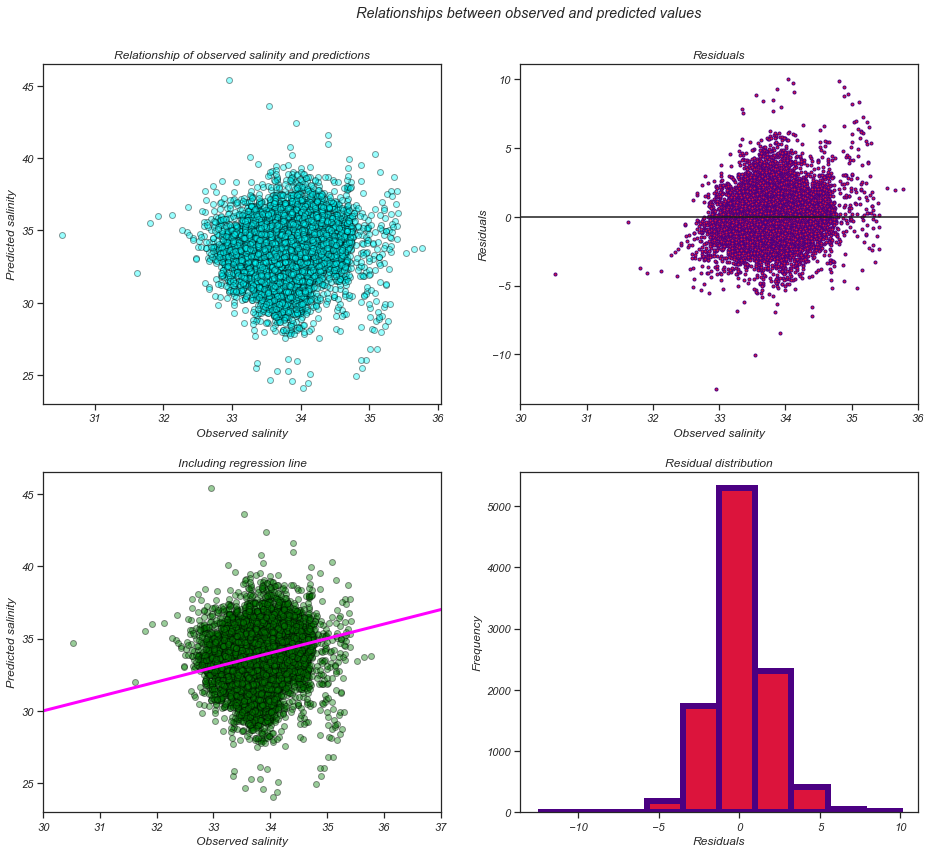

In [261]:

fig, axes = plt.subplots(2, 2, figsize=(18,8))
plt.suptitle('Relationships between observed and predicted values', x=0.5, y=1.4)
plt.subplots_adjust(bottom=0.001, right=0.8, top=1.3)

axes[0,0].scatter(KRsalinity, cv_predictions,  color='cyan', alpha=0.4, edgecolor='black')
axes[0,0].set_title("Relationship of observed salinity and predictions")
axes[0,0].set_xlabel('Observed salinity')
axes[0,0].set_ylabel('Predicted salinity')


axes[0,1].scatter( KRsalinity, residuals1_df['residuals'], marker='.', edgecolor="indigo", color='crimson')
axes[0,1].hlines(y=0, xmin=29, xmax=36)
axes[0,1].set_title("Residuals")
axes[0,1].set_xlabel('Observed salinity')
axes[0,1].set_ylabel('Residuals')
axes[0,1].set_xlim(30, 36)


axes[1,0].scatter(KRsalinity, cv_predictions,  color='green', alpha=0.4, edgecolor='black')
axes[1,0].plot([cv_predictions.min(),cv_predictions.max()],  [cv_predictions.min(),cv_predictions.max()] , color='magenta', linewidth=3)
axes[1,0].set_title("Including regression line")
axes[1,0].set_xlabel('Observed salinity')
axes[1,0].set_ylabel('Predicted salinity')
axes[1,0].set_xlim(30, 37)

axes[1,1].hist(residuals1_df['residuals'],  edgecolor="indigo", color='crimson', linewidth=6)
axes[1,1].set_title("Residual distribution")
axes[1,1].set_xlabel('Residuals')
axes[1,1].set_ylabel('Frequency')


plt.show()

In [262]:
def big_regression():
    model101 = Sequential()
    model101.add(Dense(22, input_dim=22, activation='relu', kernel_initializer='normal'))
    # input_shape=(None, N_features),
    
    model101.add(Dense(60, activation='relu', input_shape=(1,)))
    model101.add(Dense(60, activation='relu'))
    model101.add(Dense(100, activation='relu'))
    model101.add(Dense(120, activation='relu'))
    # model101.add(Dense(140, activation='relu'))
    model101.add(Dense(60, activation='relu'))

    model101.add(Dense(1, kernel_initializer='normal'))
    
    model101.compile(loss=['mean_squared_error'], 
                     optimizer='adam', 
                     metrics=['mean_squared_error', metrics.mae])
    return model101

In [263]:
# monitor_valloss_6= EarlyStopping(monitor='val_loss', patience=3)
# allbacks=[monitor_valloss_6]
# Does not work.


regression_classifiers2 = []
regression_classifiers2.append(('standardize', StandardScaler()))
regression_classifiers2.append(('mlp', KerasRegressor(build_fn=big_regression, 
                                                     epochs=30, batch_size=1000, verbose=0)))
pipeline2 = Pipeline(regression_classifiers2)

print(regression_classifiers2)
print(pipeline2)

[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', <keras.wrappers.scikit_learn.KerasRegressor object at 0x00000168F00AE448>)]
Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlp',
                 <keras.wrappers.scikit_learn.KerasRegressor object at 0x00000168F00AE448>)],
         verbose=False)


In [264]:
kfold = KFold(n_splits=10)
outcomes2 = cross_val_score(pipeline2, KRfeatures , KRsalinity, cv=kfold)

In [265]:
print(outcomes2)
outcomes2_pd = pd.Series(outcomes2)

[-1.07231641 -0.57135481 -0.6481896  -0.51761049 -0.62952894 -0.69416833
 -0.69064415 -0.66864598 -0.51567423 -1.36881459]


In [266]:
outcomes2_mean = abs(outcomes2.mean())
outcomes2_rmse = np.sqrt(abs(outcomes2_mean))
outcomes2_std = outcomes2.std()

print('outcomes2_mean:', outcomes2_mean)
print('outcomes2_rmse:', outcomes2_rmse)
print('outcomes2_std:', outcomes2_std)

outcomes2_mean: 0.7376947522163391
outcomes2_rmse: 0.8588915835053567
outcomes2_std: 0.25773438395926207


In [267]:
multi_dict = {'base': [outcomes_mse, outcomes_std, outcomes_rmse], 
              'big': [outcomes2_mean, outcomes2_std,outcomes2_rmse]}

# print(multi_dict)

multi_df_eval = pd.DataFrame(multi_dict, index=['mse', 'std', 'rmse'])
print(multi_df_eval)



          base       big
mse  -3.203385  0.737695
std   0.924415  0.257734
rmse  1.789800  0.858892


The big model produces better evaluation metrics then the base model.

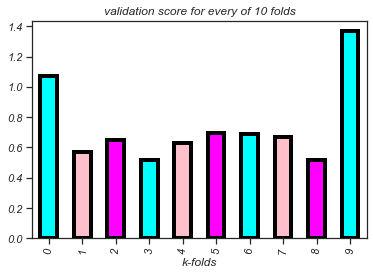

In [268]:
abs(outcomes2_pd).plot(kind='bar', 
                       title="validation score for every of 10 folds", 
                       color=['cyan', 'pink' ,'magenta'], edgecolor='black', 
                       linewidth=4)
plt.xlabel('k-folds')

plt.show()

#### Making predictions

In [269]:
cv_predictions2 = cross_val_predict(pipeline2, KRfeatures , KRsalinity, cv=10)

In [270]:
residuals2_dict = {'observed': KRsalinity, 'predictions': cv_predictions2}
residuals2_df = pd.DataFrame(residuals2_dict)
residuals2_df['residuals'] = residuals2_df.observed - residuals2_df.predictions
print(residuals2_df.head())

   observed  predictions  residuals
0    34.387    33.887707   0.499293
1    33.130    32.883953   0.246047
2    33.460    32.567745   0.892255
3    34.161    35.354671  -1.193671
4    33.300    32.666588   0.633412


#### Dashboard of relationships between observed and predicted values 2

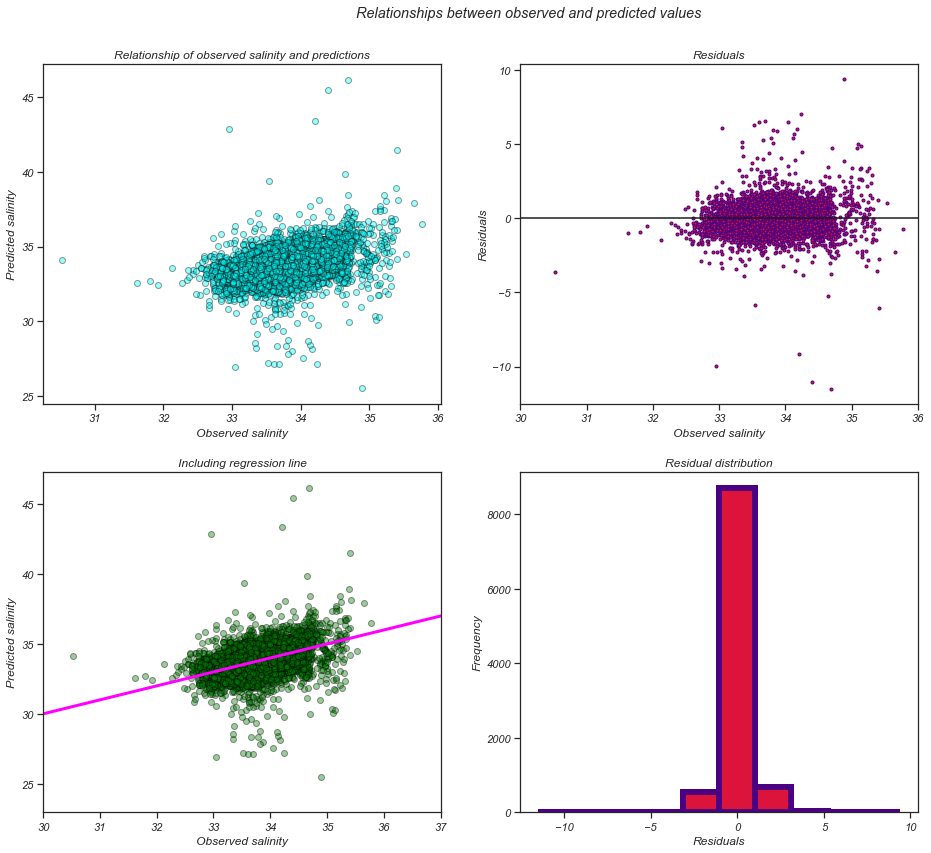

In [271]:

fig, axes = plt.subplots(2, 2, figsize=(18,8))
plt.suptitle('Relationships between observed and predicted values', x=0.5, y=1.4)
plt.subplots_adjust(bottom=0.001, right=0.8, top=1.3)

axes[0,0].scatter(KRsalinity, cv_predictions2,  color='cyan', alpha=0.4, edgecolor='black')
axes[0,0].set_title("Relationship of observed salinity and predictions")
axes[0,0].set_xlabel('Observed salinity')
axes[0,0].set_ylabel('Predicted salinity')


axes[0,1].scatter( KRsalinity, residuals2_df['residuals'], marker='.', edgecolor="indigo", color='crimson')
axes[0,1].hlines(y=0, xmin=29, xmax=36)
axes[0,1].set_title("Residuals")
axes[0,1].set_xlabel('Observed salinity')
axes[0,1].set_ylabel('Residuals')
axes[0,1].set_xlim(30, 36)


axes[1,0].scatter(KRsalinity, cv_predictions2,  color='green', alpha=0.4, edgecolor='black')
axes[1,0].plot([cv_predictions.min(),cv_predictions.max()],  [cv_predictions.min(),cv_predictions.max()] , color='magenta', linewidth=3)
axes[1,0].set_title("Including regression line")
axes[1,0].set_xlabel('Observed salinity')
axes[1,0].set_ylabel('Predicted salinity')
axes[1,0].set_xlim(30, 37)

axes[1,1].hist(residuals2_df['residuals'],  edgecolor="indigo", color='crimson', linewidth=6)
axes[1,1].set_title("Residual distribution")
axes[1,1].set_xlabel('Residuals')
axes[1,1].set_ylabel('Frequency')


plt.show()

## Conclusion

The scikit machine learning model applying ordinal-least-squared regression performs very good.
The deep learning models perform also good, while not as good as the scikit model. 
However it could be shown again that deep learning models are improving with number of epochs and
a revised layer topology at least to a certain point. 
It is possible to tune deep learning models further to get better results. 
Also with concerns to practical computational capacity only a random subset was used here.
This could have influenced the results in a low range.
Anyway it could be shown that deeplearning models are able to solve linear regression problems.